# EDA

## 0. Cài đặt thư viện

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Cài đặt style visualization
plt.style.use("ggplot")
sns.set()

## 1. Chuẩn bị dữ liêu

In [48]:
confirmed = pd.read_csv("../data/2_processed/01_confirmed_long.csv")
deaths    = pd.read_csv("../data/2_processed/02_deaths_long.csv")
recovered = pd.read_csv("../data/2_processed/03_recovered_long.csv")

display(Markdown("## Confirmed"))
display(confirmed.head(2))

display(Markdown("## Deaths"))
display(deaths.head(2))

display(Markdown("## Recovered"))
display(recovered.head(2))


## Confirmed

,Country/Region,Date,Confirmed
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0


## Deaths

,Country/Region,Date,Deaths
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0


## Recovered

,Country/Region,Date,Recovered
0,Afghanistan,2020-01-22,0
1,Albania,2020-01-22,0


## 2. Phân tích mô tả

### A. Confirmed Data

### 2.1 Tổng số ca theo năm trên toàn thế giới

**Mục tiêu:** tổng số ca tích lũy COVID-19 trên toàn cầu thay đổi theo từng năm, nhằm nhận diện mức độ bùng phát và tốc độ lan rộng của dịch trong giai đoạn 2020–2023.

**Biểu đồ:** Line chart, Bar chart.

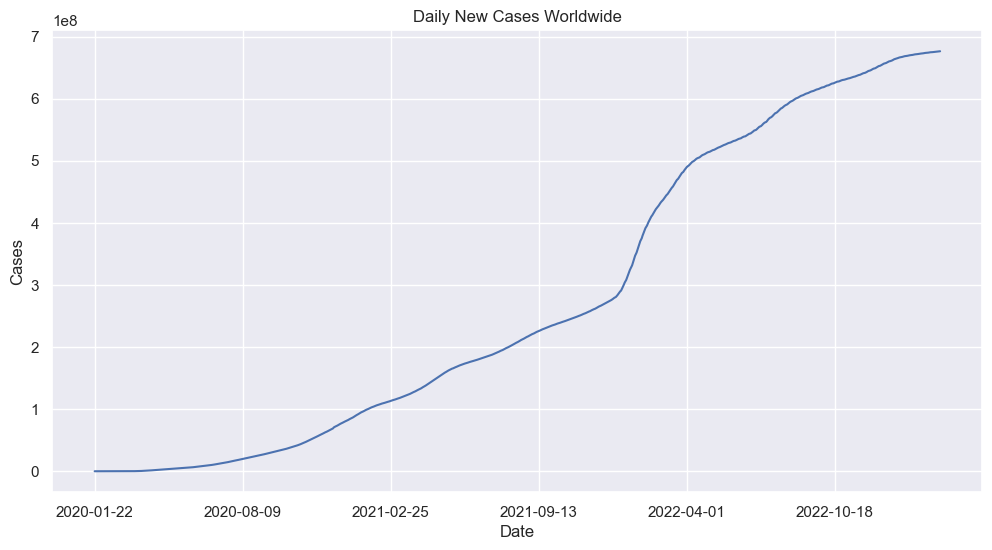

,Year,Total Cases
0,2020,"7,642,565,602"
1,2021,"67,131,717,992"
2,2022,"196,529,309,166"
3,2023,"45,606,703,559"


In [49]:
global_confirmed = confirmed.groupby("Date")["Confirmed"].sum()
global_confirmed.plot(figsize=(12,6))
plt.title("Daily New Cases Worldwide")
plt.ylabel("Cases")
plt.xlabel("Date")
plt.show()
# Đảm bảo Date là datetime
confirmed["Date"] = pd.to_datetime(confirmed["Date"])

# Tính tổng ca theo năm
yearly_cases = confirmed.groupby(confirmed["Date"].dt.year)["Confirmed"].sum()

# Đưa vào DataFrame
df_yearly = yearly_cases.reset_index()
df_yearly.columns = ["Year", "Total Cases"]

# Format dấu phẩy
df_yearly["Total Cases"] = df_yearly["Total Cases"].apply(lambda x: f"{x:,}")

# Hiển thị bảng
df_yearly


**Nhận xét:**
Biểu đồ hiển thị một đường cong dốc đứng, với nhiều đợt sóng lớn:

- Sóng 1 (2020) – bùng phát chậm, nhỏ

- Sóng 2 (2021) – Delta: tăng mạnh

- Sóng 3 (2022) – Omicron: đỉnh cao nhất

**Insight:**
Mỗi đỉnh sóng trong đồ thị tương ứng với một biến chủng mới. Đỉnh cuối cùng – Omicron – cho thấy tốc độ lây lan nhanh chưa từng có.

### 2.2 Ai bị ảnh hưởng nặng nhất? – Top quốc gia có tổng ca nhiễm cao

**Mục tiêu:** 
- Xác định top 10 quốc gia bị ảnh hưởng nặng nhất bởi COVID-19, tính theo tổng số ca nhiễm mới nhất.
- So sánh mức độ ảnh hưởng giữa các quốc gia.

**Biểu đồ:** Bar chart.

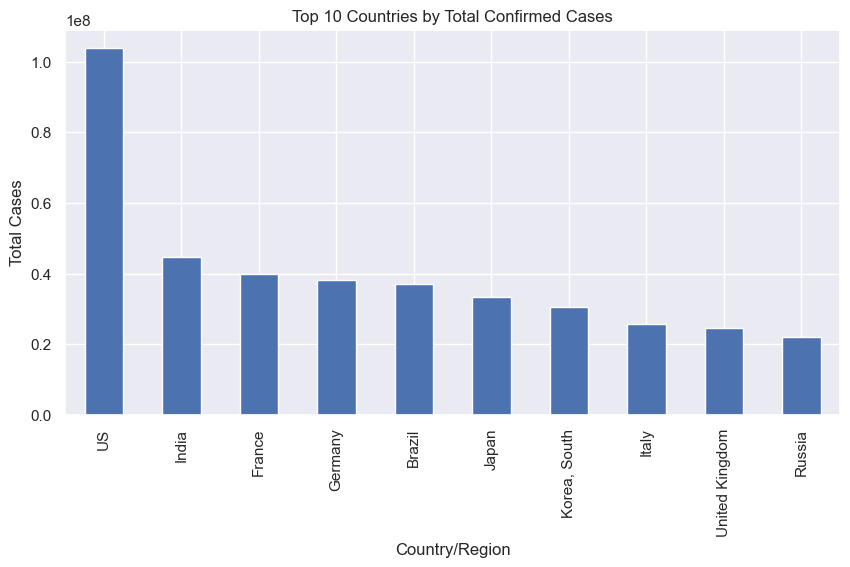

,Country/Region,Total Cases
0,US,"103,802,702"
1,India,"44,690,738"
2,France,"39,866,718"
3,Germany,"38,249,060"
4,Brazil,"37,076,053"
5,Japan,"33,320,438"
6,"Korea, South","30,615,522"
7,Italy,"25,603,510"
8,United Kingdom,"24,658,705"
9,Russia,"22,075,858"


In [50]:
latest = confirmed[confirmed["Date"] == confirmed["Date"].max()]
top10 = latest.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)

top10.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries by Total Confirmed Cases")
plt.ylabel("Total Cases")
plt.show()

# Lấy dữ liệu ngày mới nhất
latest = confirmed[confirmed["Date"] == confirmed["Date"].max()]

# Tính tổng ca nhiễm theo quốc gia và lấy top 10
top10 = latest.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)

# Chuyển thành bảng
df_top10 = top10.reset_index()
df_top10.columns = ["Country/Region", "Total Cases"]

# Format số
df_top10["Total Cases"] = df_top10["Total Cases"].apply(lambda x: f"{x:,}")

# Hiển thị bảng
display(df_top10)



**Nhận xét:**
Các quốc gia đứng đầu có số ca nhiễm rất cao, phản ánh mức độ bùng phát mạnh và kéo dài của dịch. Những nước có dân số lớn và mức độ giao thương cao như Mỹ, Ấn Độ, Pháp luôn nằm trong top đầu. Sự chênh lệch lớn giữa các quốc gia cho thấy hiệu quả kiểm soát dịch khác nhau rõ rệt.

**Insight:**
Hoa Kỳ luôn dẫn đầu về số ca nhiễm – gần gấp đôi Ấn Độ. Điều này phản ánh quy mô dân số, mức độ xét nghiệm, và thời điểm kiểm soát dịch.

### 2.3 Phân bố số ca nhiễm theo ngày

**Mục tiêu:** hiểu dữ liệu phân bố như thế nào, có lệch không, có đỉnh bất thường không.

**Biểu đồ:** Histogram + Density Plot.

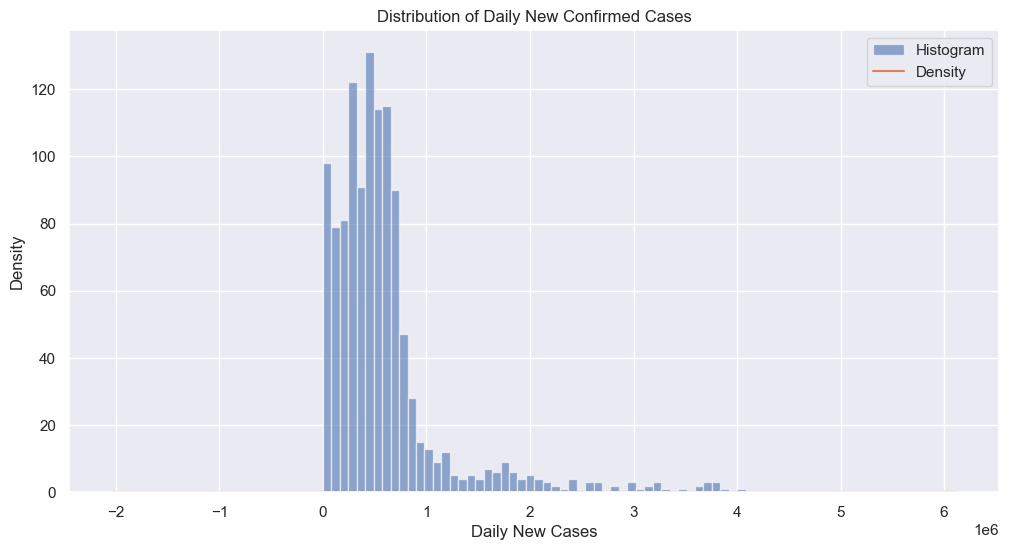

,Date,DailyConfirmed
count,1143,1.143000e+03
mean,2021-08-15 00:00:00,5.919244e+05
min,2020-01-22 00:00:00,0.000000e+00
25%,2020-11-02 12:00:00,2.651960e+05
50%,2021-08-15 00:00:00,4.725230e+05
75%,2022-05-27 12:00:00,6.767740e+05
max,2023-03-09 00:00:00,4.083281e+06
std,NaN,5.956479e+05


In [51]:
# Tính số ca nhiễm mới theo ngày
confirmed_sorted = confirmed.sort_values("Date")
confirmed_sorted["DailyConfirmed"] = confirmed_sorted.groupby("Country/Region")["Confirmed"].diff().fillna(0)

# Tổng số ca mỗi ngày (toàn cầu)
global_daily = confirmed_sorted.groupby("Date")["DailyConfirmed"].sum().reset_index()

# Histogram + Density
plt.figure(figsize=(12,6))
global_daily["DailyConfirmed"].plot(kind="hist", bins=50, alpha=0.6, label="Histogram")
global_daily["DailyConfirmed"].plot(kind="density", label="Density")
plt.title("Distribution of Daily New Confirmed Cases")
plt.xlabel("Daily New Cases")
plt.legend()
plt.show()

# Hiển thị bảng mô tả
global_daily.describe()

### 2.4 So sánh mức độ lan truyền giữa các quốc gia

**Mục tiêu:**
xem quốc gia có đợt bùng phát kéo dài hay ngắn.

**Biểu đồ:** Box and Whisker Plot.

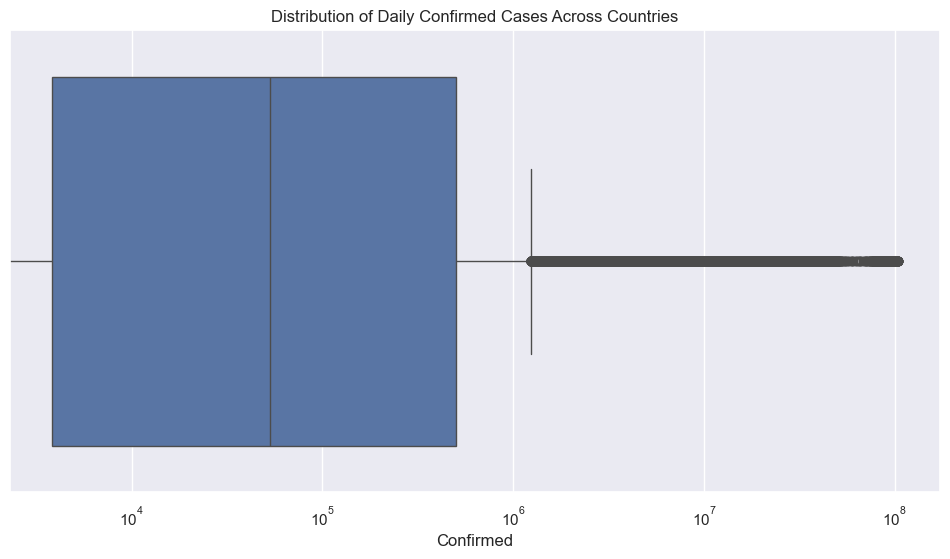

In [52]:
daily_by_country = confirmed_sorted.groupby(["Country/Region", "Date"])["Confirmed"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.boxplot(data=daily_by_country, x="Confirmed")
plt.xscale("log") 
plt.title("Distribution of Daily Confirmed Cases Across Countries")
plt.show()


**Nhận xét:**
- Boxplot cho thấy phần lớn quốc gia có median thấp → bùng phát không đều.

- Một số quốc gia có outliers rất cao → dịch kéo dài hoặc kiểm soát kém.

**Insight:**
- Boxplot giúp xác định quốc gia có đỉnh dịch bất thường.

- Cũng cho thấy mức độ lan truyền không đồng đều giữa các vùng.


### 2.5 Xu hướng tăng theo thời gian

**Mục tiêu:**
tìm xu hướng tăng theo thời gian.

**Biểu đồ:**
Scatter Matrix.


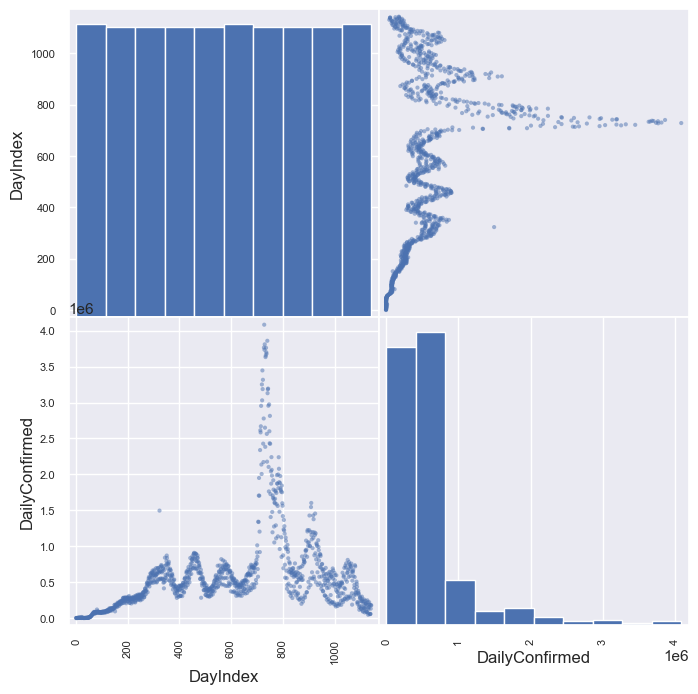

In [53]:
from pandas.plotting import scatter_matrix

df_scatter = global_daily.copy()
df_scatter["DayIndex"] = range(len(df_scatter))

scatter_matrix(df_scatter[["DayIndex", "DailyConfirmed"]], figsize=(8,8))
plt.show()

**Insight:**
- Xu hướng tổng thể: càng về cuối dataset, giá trị daily càng lớn → đỉnh Omicron.

- Scatter matrix giúp xem dữ liệu có linear trend hay không (ở đây: không tuyến tính).

### B. Deaths

### 2.6 Số ca tử vong theo quốc gia

**Mục tiêu:**
- Xem số ca tử vong ở từng quốc gia như thế nào:

    + Quốc gia nào tử vong thấp, quốc gia nào cao.

    + Phát hiện outlier (quốc gia có số ca tử vong cực kỳ cao).

- Hiểu mức độ tập trung: nhiều quốc gia tử vong ít, một số ít cực cao.

**Biểu đồ:** Histogram.

        Country/Region  Deaths
0          Afghanistan    7896
1              Albania    3598
2              Algeria    6881
3              Andorra     165
4               Angola    1933
5           Antarctica       0
6  Antigua and Barbuda     146
7            Argentina  130472
8              Armenia    8727
9            Australia   19574


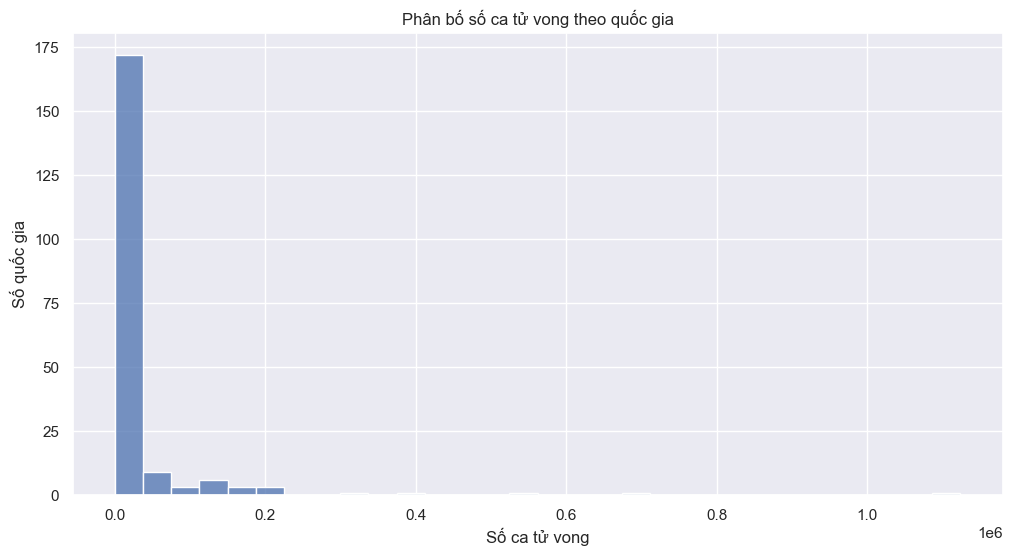

In [54]:
# Tổng ca tử vong theo quốc gia
country_deaths = deaths.groupby("Country/Region")["Deaths"].max().reset_index()

# Bảng dữ liệu
print(country_deaths.head(10))

# Histogram
plt.figure(figsize=(12,6))
sns.histplot(country_deaths["Deaths"], bins=30, kde=False)
plt.title("Phân bố số ca tử vong theo quốc gia")
plt.xlabel("Số ca tử vong")
plt.ylabel("Số quốc gia")
plt.show()


**Nhận xét:** 
Số ca tử vong cũng phân bố không đồng đều, nhiều quốc gia có ca thấp.

**Insight:**
Tương tự ca nhiễm, một vài quốc gia chiếm phần lớn số tử vong.


### 2.7 Mật độ ca tử vong

**Mục đích:**
Tương tự ca nhiễm, một vài quốc gia chiếm phần lớn số tử vong.

**Biểu đồ:**
Density Plot

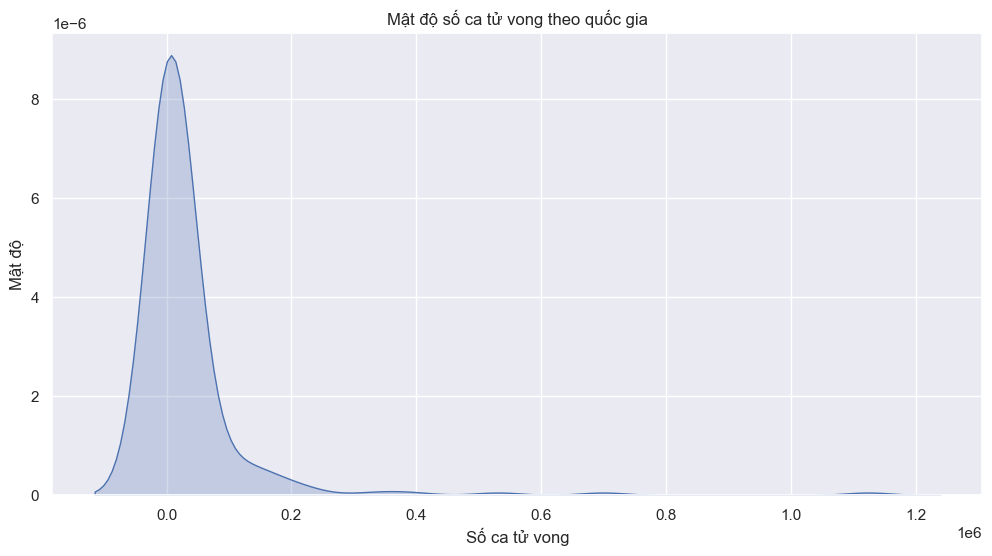

In [55]:
plt.figure(figsize=(12,6))
sns.kdeplot(country_deaths["Deaths"], fill=True)
plt.title("Mật độ số ca tử vong theo quốc gia")
plt.xlabel("Số ca tử vong")
plt.ylabel("Mật độ")
plt.show()

**Nhận xét:**
Peak xuất hiện ở số ca tử vong thấp, một số quốc gia có ca rất cao.

**Insight:**
Có những “outlier” tử vong cao, có thể là các ổ dịch nặng.

### 2.8 So sánh số ca tử vong giữa các quốc gia

**Mục đích:**
Nhìn tổng quan sự chênh lệch tử vong.

**Biểu đồ:**
Box and Whisker Plot

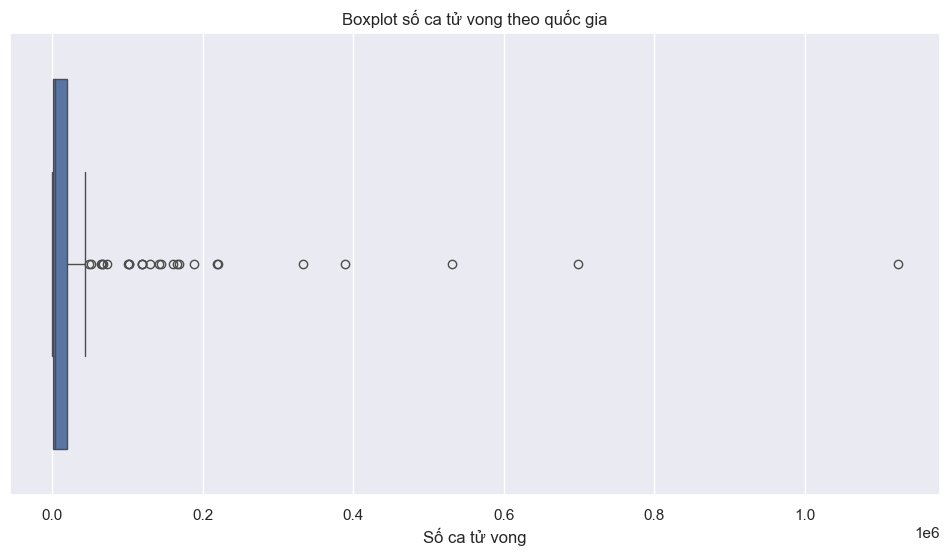

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x=country_deaths["Deaths"])
plt.title("Boxplot số ca tử vong theo quốc gia")
plt.xlabel("Số ca tử vong")
plt.show()

**Nhận xét:** 
Có nhiều outlier (quốc gia có tử vong cao).

**Insight:**
Các quốc gia chịu ảnh hưởng nặng cần chú ý.

### 2.9 Mối quan hệ giữa ngày và số ca tử vong

**Mục đích:**
Kiểm tra xu hướng tử vong theo thời gian giữa các quốc gia.

**Biểu đồ:**
Correlation Matrix Plot

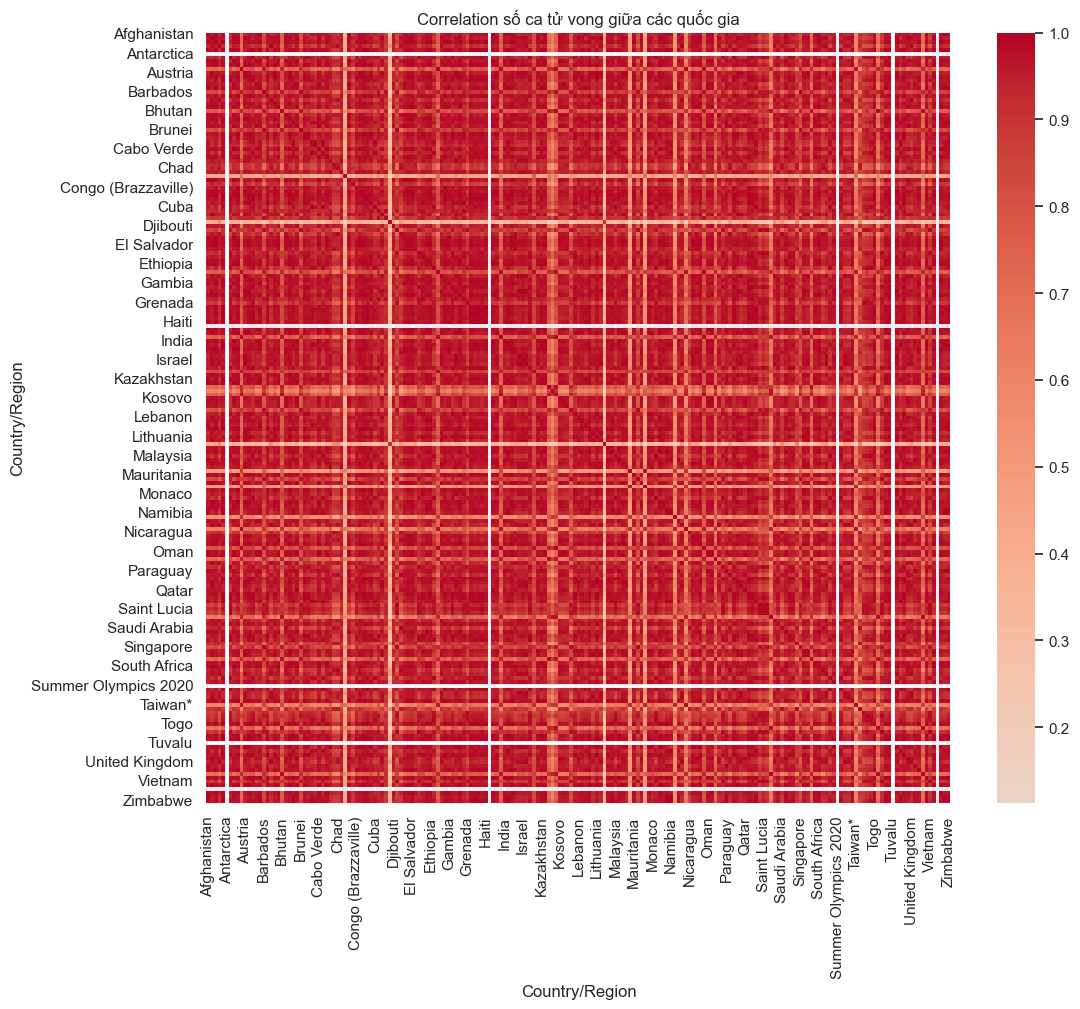

In [57]:
pivot_deaths = deaths.pivot(index="Date", columns="Country/Region", values="Deaths").fillna(0)

corr_deaths = pivot_deaths.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_deaths, cmap="coolwarm", center=0)
plt.title("Correlation số ca tử vong giữa các quốc gia")
plt.show()

**Nhận xét:**
Một số quốc gia có pattern tử vong tương tự.

**Insight:**
Các quốc gia cùng khu vực có thể có xu hướng tử vong đồng bộ.

### 2.10 So sánh xu hướng tử vong giữa các quốc gia

**Mục đích:**
Xem các quốc gia tăng/giảm tử vong cùng lúc hay khác nhau.

**Biểu đồ:**
Scatter Plot Matrix

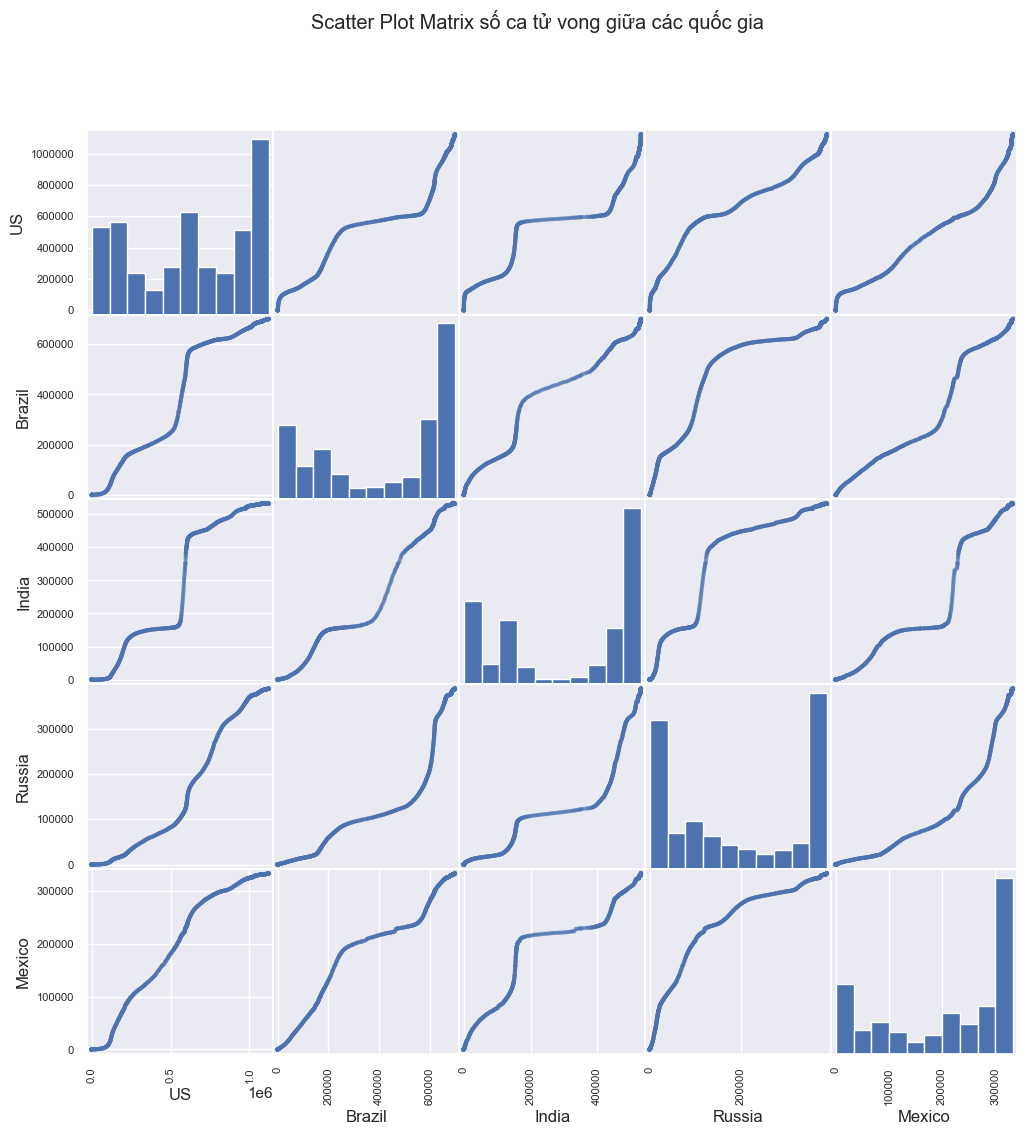

In [58]:
# Top 5 quốc gia tử vong cao nhất
top5_deaths = country_deaths.sort_values(by="Deaths", ascending=False)["Country/Region"].head(5).tolist()
pivot_top5_deaths = pivot_deaths[top5_deaths]

scatter_matrix(pivot_top5_deaths, figsize=(12,12), alpha=0.5)
plt.suptitle("Scatter Plot Matrix số ca tử vong giữa các quốc gia")
plt.show()

**Nhận xét:**
Một số quốc gia có xu hướng tử vong song song.

**Insight:**
Giúp dự đoán tử vong dựa trên quốc gia khác cùng khu vực.

### C. Recoverd

### 2.11 Phân bố số ca hồi phục theo quốc gia

**Mục đích:**
Xem quốc gia nào có số ca hồi phục cao/thấp.

**Biểu đồ:**
Histogram

        Country/Region  Recovered
0          Afghanistan      82586
1              Albania     130314
2              Algeria     118409
3              Andorra      14380
4               Angola      39582
5           Antarctica          0
6  Antigua and Barbuda       1239
7            Argentina    4615834
8              Armenia     220438
9            Australia      24203


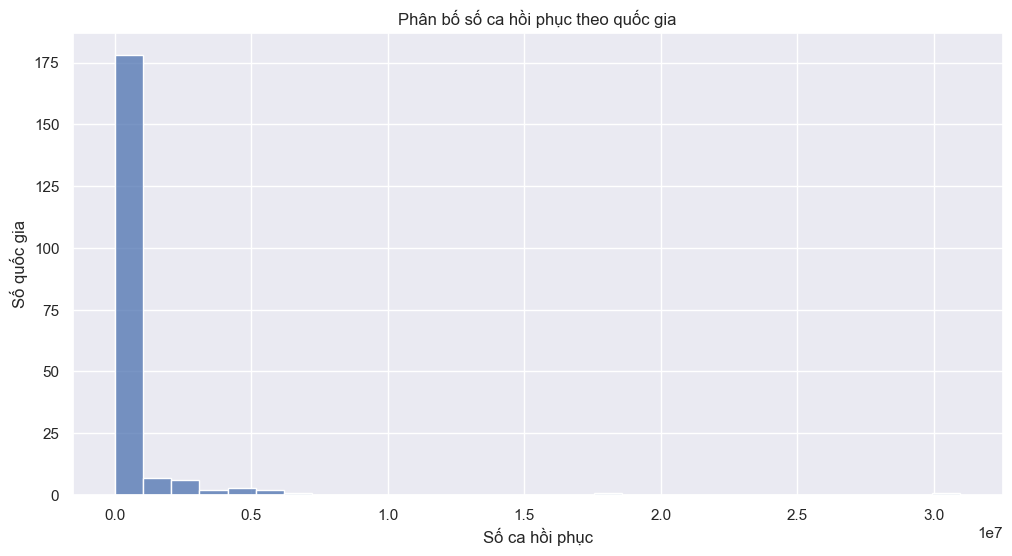

In [59]:
country_recovered = recovered.groupby("Country/Region")["Recovered"].max().reset_index()

print(country_recovered.head(10))

plt.figure(figsize=(12,6))
sns.histplot(country_recovered["Recovered"], bins=30, kde=False)
plt.title("Phân bố số ca hồi phục theo quốc gia")
plt.xlabel("Số ca hồi phục")
plt.ylabel("Số quốc gia")
plt.show()

**Nhận xét:**
Tương tự số ca nhiễm, nhiều quốc gia hồi phục ít, một số nhiều.

**Insight:**
Một số quốc gia hồi phục nhanh có thể nhờ hệ thống y tế tốt.

### 2.12 Mật độ ca hồi phục

**Mục đích:**
Xem phân bố liên tục ca hồi phục giữa các quốc gia.

**Biểu đồ:**
Density Plot

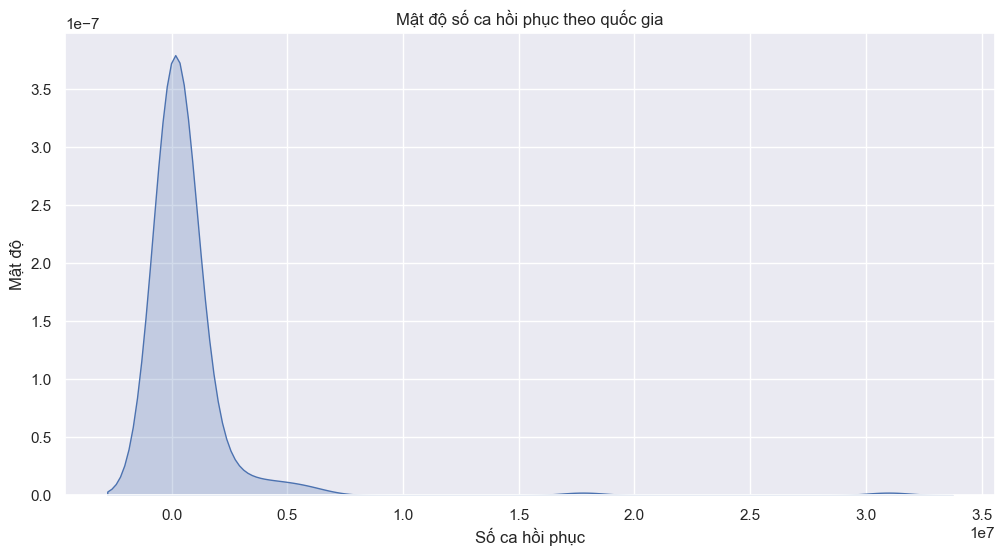

In [60]:
plt.figure(figsize=(12,6))
sns.kdeplot(country_recovered["Recovered"], fill=True)
plt.title("Mật độ số ca hồi phục theo quốc gia")
plt.xlabel("Số ca hồi phục")
plt.ylabel("Mật độ")
plt.show()

**Nhận xét:**
Nhiều quốc gia có ca hồi phục thấp, peak ở số ca thấp.

**Insight:**
Có thể nhóm quốc gia theo hiệu quả phục hồi.

### 2.13 So sánh ca hồi phục giữa các quốc gia

**Mục đích:**
Xem sự chênh lệch hồi phục

**Biểu đồ:**
Box and Whisker Plot

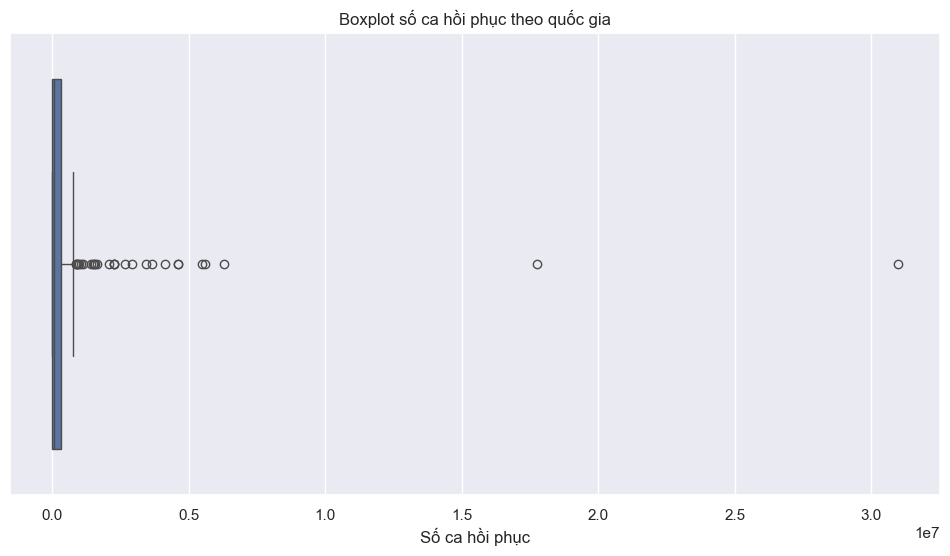

In [61]:
plt.figure(figsize=(12,6))
sns.boxplot(x=country_recovered["Recovered"])
plt.title("Boxplot số ca hồi phục theo quốc gia")
plt.xlabel("Số ca hồi phục")
plt.show()

**Nhận xét:**
Outlier xuất hiện ở các quốc gia hồi phục nhiều.

**Insight:**
Một số quốc gia hồi phục nhanh, cần phân tích thêm.

### 2.14 Mối quan hệ giữa ngày và số ca hồi phục

**Mục đích:**
Kiểm tra xu hướng hồi phục theo thời gian giữa các quốc gia.

**Biểu đồ:**
Correlation Matrix Plot

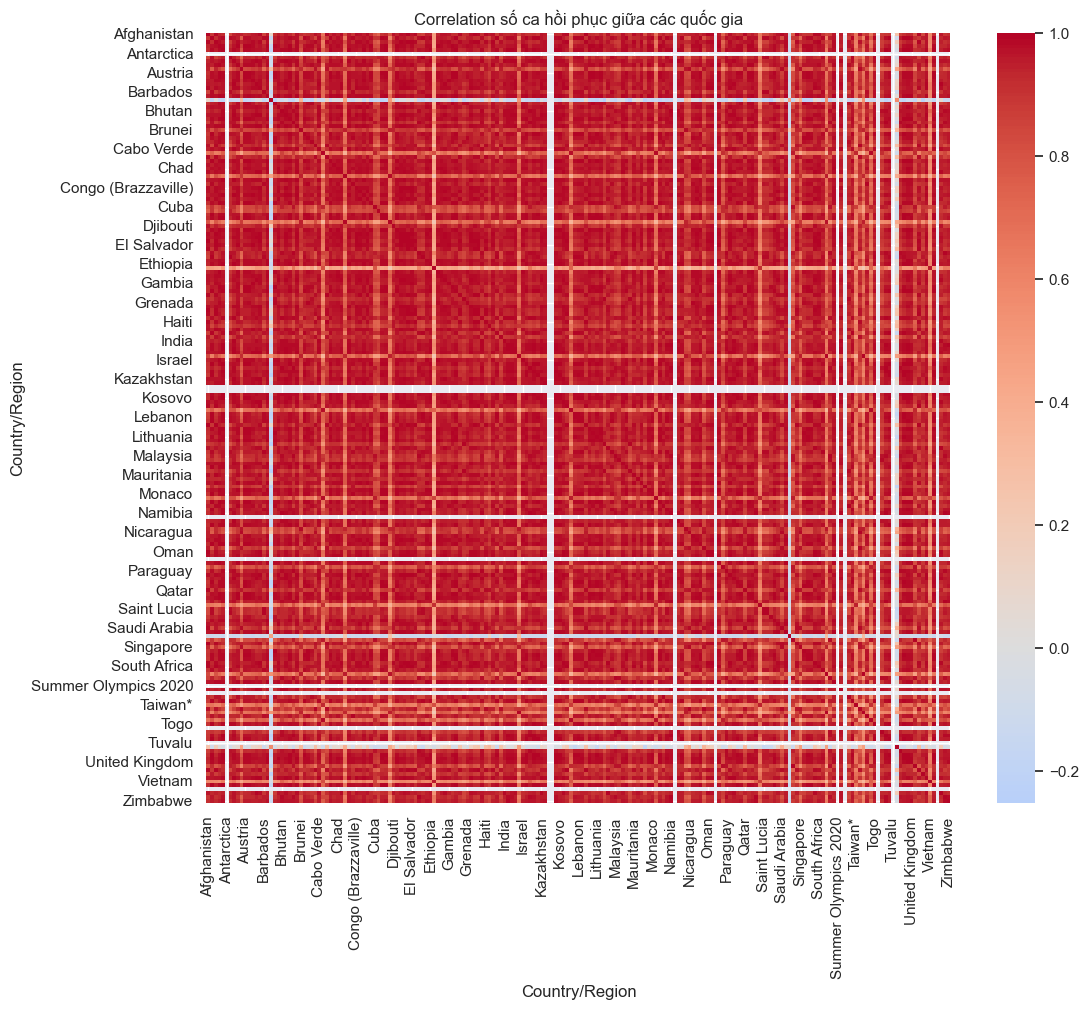

In [62]:
pivot_recovered = recovered.pivot(index="Date", columns="Country/Region", values="Recovered").fillna(0)
corr_recovered = pivot_recovered.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_recovered, cmap="coolwarm", center=0)
plt.title("Correlation số ca hồi phục giữa các quốc gia")
plt.show()


**Nhận xét:**
Một số quốc gia có xu hướng hồi phục đồng bộ.

**Insight:**
Có thể xác định nhóm quốc gia hồi phục nhanh/chậm.

### 2.15 So sánh xu hướng hồi phục giữa các quốc gia

**Mục đích:**
Kiểm tra các quốc gia hồi phục song song hay khác nhau.

**Biểu đồ:**
Scatter Plot Matrix

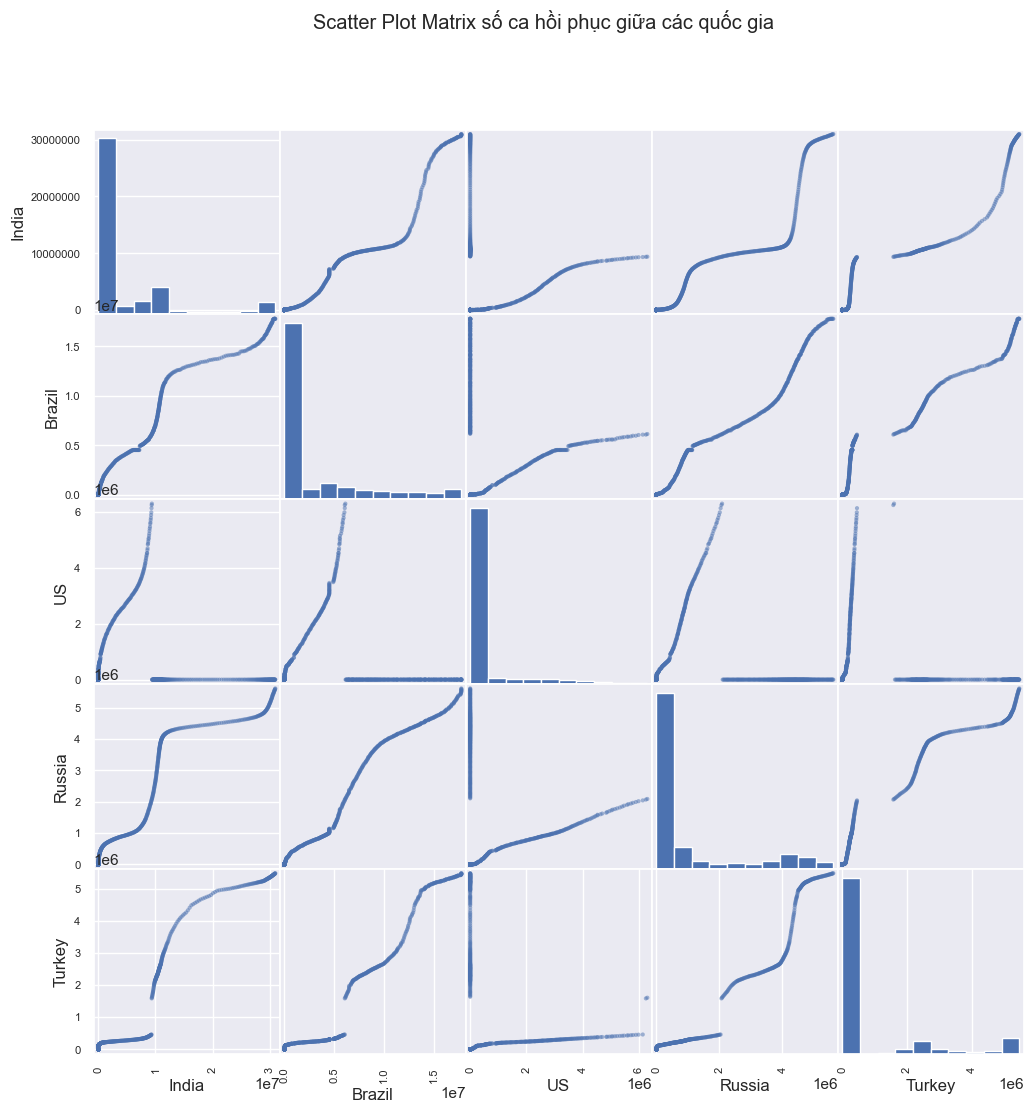

In [63]:
top5_recovered = country_recovered.sort_values(by="Recovered", ascending=False)["Country/Region"].head(5).tolist()
pivot_top5_recovered = pivot_recovered[top5_recovered]

scatter_matrix(pivot_top5_recovered, figsize=(12,12), alpha=0.5)
plt.suptitle("Scatter Plot Matrix số ca hồi phục giữa các quốc gia")
plt.show()

**Nhận xét:**
Một số quốc gia hồi phục theo pattern tương tự.

**Insight:**
Có thể dự đoán xu hướng hồi phục quốc gia này dựa trên quốc gia khác cùng khu vực.

### D. Kết hợp 3 Dataset

### 2.16 Tỷ lệ tử vong/ca nhiễm theo quốc gia

**Mục đích:**
Xác định quốc gia nào có tỷ lệ tử vong cao so với số ca nhiễm.

**Biểu đồ:**
Bar Plot / Scatter Plot

Country/Region
Korea, North              6.000000
MS Zaandam                0.222222
Yemen                     0.180745
Sudan                     0.078601
Syria                     0.055058
Somalia                   0.049810
Peru                      0.048922
Egypt                     0.048108
Mexico                    0.044523
Bosnia and Herzegovina    0.040525
dtype: float64


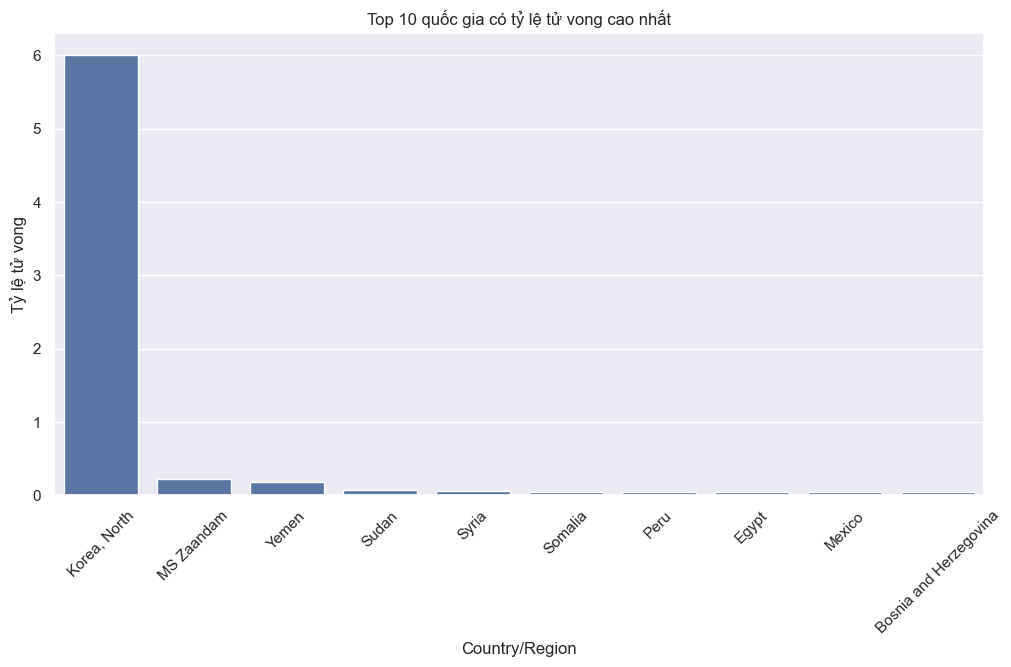

In [64]:
# Tổng số ca theo quốc gia
total_confirmed = confirmed.groupby("Country/Region")["Confirmed"].max()
total_deaths = deaths.groupby("Country/Region")["Deaths"].max()

# Tỷ lệ tử vong
mortality_rate = (total_deaths / total_confirmed).fillna(0).sort_values(ascending=False).head(10)

# Bảng dữ liệu
print(mortality_rate)

# Biểu đồ
plt.figure(figsize=(12,6))
sns.barplot(x=mortality_rate.index, y=mortality_rate.values)
plt.xticks(rotation=45)
plt.ylabel("Tỷ lệ tử vong")
plt.title("Top 10 quốc gia có tỷ lệ tử vong cao nhất")
plt.show()


**Nhận xét:**
Một số quốc gia có ca nhiễm thấp nhưng tỷ lệ tử vong cao.

**Insight:**
Tỷ lệ tử vong cao có thể do hệ thống y tế yếu hoặc thiếu dữ liệu ca nhiễm.

### 2.17 Tỷ lệ hồi phục / ca nhiễm theo quốc gia

**Mục đích:**
Xem quốc gia nào phục hồi tốt so với số ca nhiễm.

**Biểu đồ:**
Bar Plot

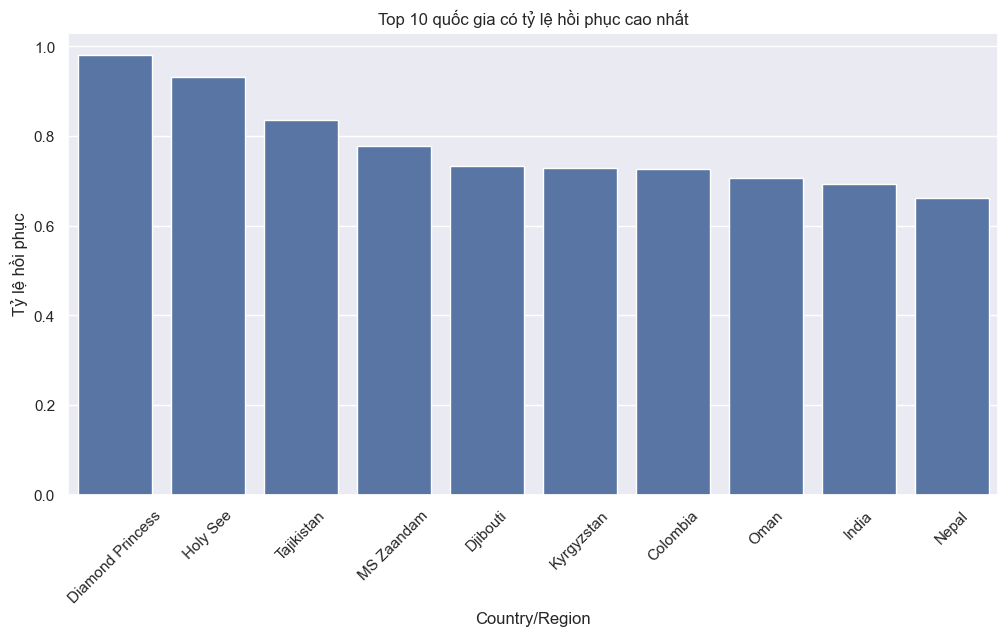

In [65]:
total_recovered = recovered.groupby("Country/Region")["Recovered"].max()

recovery_rate = (total_recovered / total_confirmed).fillna(0).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=recovery_rate.index, y=recovery_rate.values)
plt.xticks(rotation=45)
plt.ylabel("Tỷ lệ hồi phục")
plt.title("Top 10 quốc gia có tỷ lệ hồi phục cao nhất")
plt.show()


**Nhận xét:**
Một số quốc gia có tỷ lệ hồi phục gần 100%, chứng tỏ kiểm soát dịch tốt.

**Insight:**
Có thể xác định các quốc gia có chiến lược điều trị hiệu quả.

### 2.18 Mối quan hệ giữa ca nhiễm và tử vong

**Mục đích:**
Kiểm tra xem quốc gia có nhiều ca nhiễm thì tử vong có cao không.

**Biểu đồ:**
Scatter Plot + Regression Line

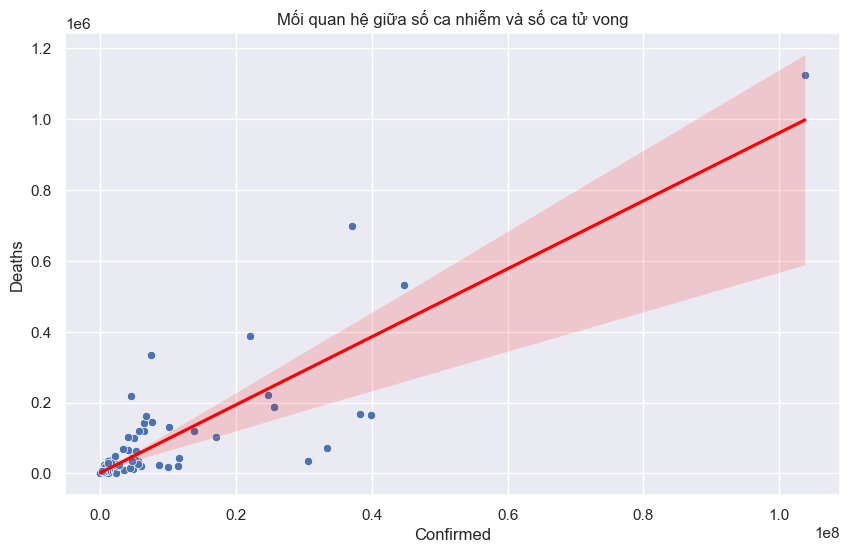

In [66]:
df = pd.DataFrame({
    "Confirmed": total_confirmed,
    "Deaths": total_deaths
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Confirmed", y="Deaths")
sns.regplot(data=df, x="Confirmed", y="Deaths", scatter=False, color="red")
plt.title("Mối quan hệ giữa số ca nhiễm và số ca tử vong")
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.show()

**Nhận xét:**
Có xu hướng tuyến tính nhưng nhiều outlier.

**Insight:**
Một số quốc gia có ca nhiễm cao nhưng tử vong thấp (hệ thống y tế tốt).

### 2.19 Mối quan hệ giữa ca nhiễm và hồi phục

**Mục đích:**
Kiểm tra hiệu quả phục hồi theo số ca nhiễm.

**Biểu đồ:**
Scatter Plot + Regression Line

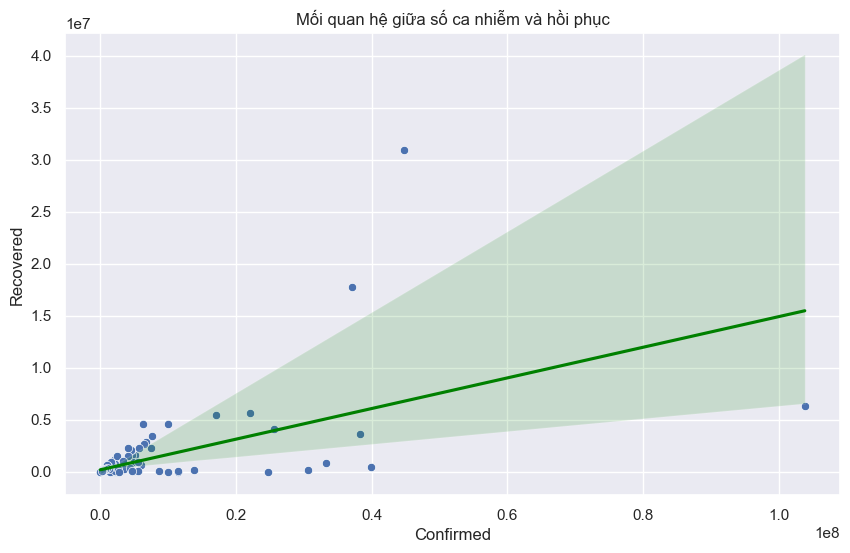

In [67]:
df = pd.DataFrame({
    "Confirmed": total_confirmed,
    "Recovered": total_recovered
})

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Confirmed", y="Recovered")
sns.regplot(data=df, x="Confirmed", y="Recovered", scatter=False, color="green")
plt.title("Mối quan hệ giữa số ca nhiễm và hồi phục")
plt.xlabel("Confirmed")
plt.ylabel("Recovered")
plt.show()

**Nhận xét:**
Quốc gia có nhiều ca nhiễm thường hồi phục nhiều, nhưng tỷ lệ khác nhau.

**Insight:**
Hiệu quả điều trị khác nhau giữa các quốc gia.

### 2.20 Tỷ lệ tử vong và hồi phục theo khu vực hoặc quốc gia

**Mục đích:**
So sánh tỷ lệ tử vong và hồi phục để đánh giá quản lý dịch.

**Biểu đồ:**
Scatter Plot Matrix hoặc Pair Plot

<Figure size 1000x1000 with 0 Axes>

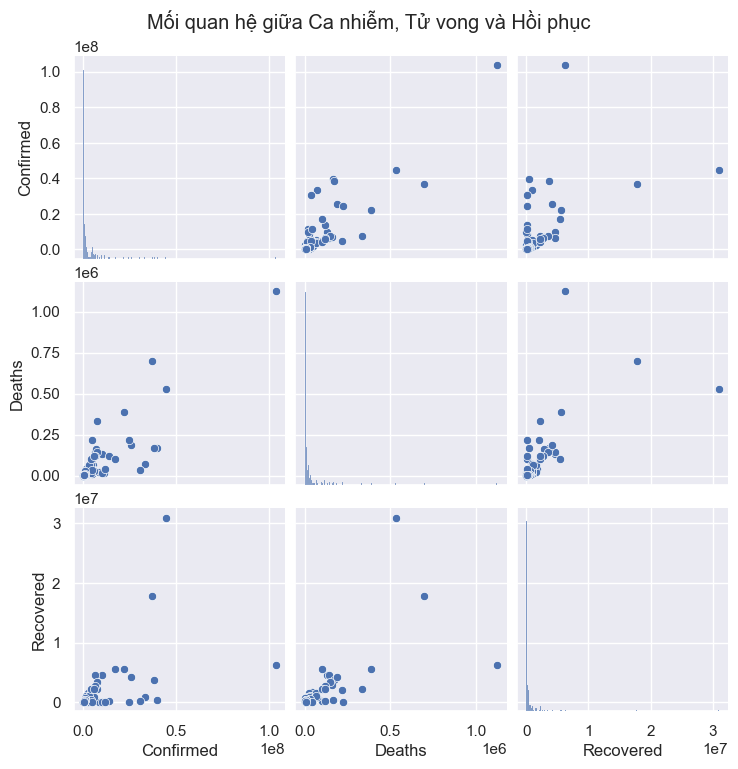

In [68]:
df = pd.DataFrame({
    "Confirmed": total_confirmed,
    "Deaths": total_deaths,
    "Recovered": total_recovered
})

plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.suptitle("Mối quan hệ giữa Ca nhiễm, Tử vong và Hồi phục", y=1.02)
plt.show()

**Nhận xét:**
Có thể thấy quốc gia có ca nhiễm cao nhưng hồi phục nhiều, tử vong ít.

**Insight:**
Giúp xác định quốc gia kiểm soát dịch tốt và kém, phục vụ dự báo chính sách.